# Geospatial Data Analysis I 

## Map visualisation in Python - Solution 

### Exercise 1: Simple maps with *Cartopy*

We start with a simple map of Germany that shows the countries boundaries. 

- First, create an Axes object (e.g. "ax") using `plt.axes()`, and define its projection as Universal Transverse Mercator Zone 32 using cartopy.crs `projection=cartopy.crs.UTM(zone=32)`. 

- Then, add cartopy features for coastlines (`add_feature(cartopy.feature.COASTLINE`) and boundaries (`add_feature(cartopy.feature.BORDERS`) to the axes object. Also, set the spatial extent of the map to something fitting (`ax.set_extent([xmin, xmax, ymin, ymax])`), and add a title to your map. 

c:\Users\kathr\anaconda3\envs\GDA1\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\kathr\anaconda3\envs\GDA1\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


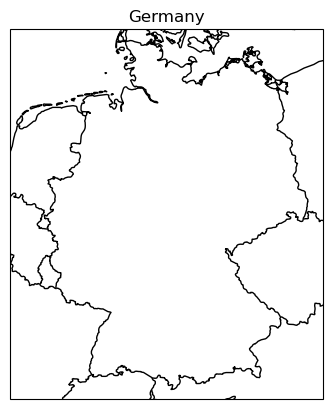

In [1]:
# [1] 
# importing the required packages
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# define axes with a geographic projection
ax = plt.axes(projection=ccrs.UTM(zone=32))

# adding coastlines and national boundaries
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# setting the map extent
ax.set_extent([5, 15, 47, 55])

# adding a title
ax.set_title('Germany')

plt.show()

### Exercise 2: Place of Birth

Now, we would like to create a simple map (as above) that shows your place of birth as a red marker. 

- Likewise to the exercise above, create an Axes object using a projection, and add coastlines and borders. 

- Then, use the "Nominatim" functionality from "Geopy.geocoders" to get the location of your place of birth (i.e. the city), by defining the geolocator (`geolocator = Nominatim(user_agent="Example")`) and then extracting the coordinates (`location = geolocator.geocode("city, country")`). 

- To plot yout place of birth you need to transform the coordinates as they come from the geolocator (WGS84 projection) to the specfic projection of your axes / map (UTM32). Use `ax.plot()` to add a marker to the map, and add `transform=ccrs.Geodetic()` as an additional argument besides the location (use the correct index!) and marker properties. 

- If needed, adapt the map extent to show the marker. 

(51.3157833, 9.4978479)


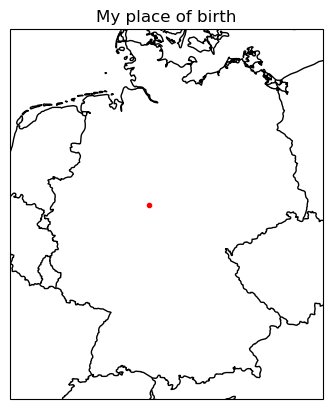

In [2]:
# [2]
# creating an axes object with a projection
ax = plt.axes(projection=ccrs.UTM(zone=32))

# adding features for coastlines and borders
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Geolocation with Geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Example")
location = geolocator.geocode("Kassel, Germany")
print(location[1])

# plotting location on the axes, using the transform argument
ax.plot(location[1][1], location[1][0], markersize=3, marker='o', color='red', transform=ccrs.Geodetic())

# setting map extent
ax.set_extent([5, 15, 47, 55])

# map title
ax.set_title('My place of birth')

plt.show()


### Exercise 3: Geopandas and Basemaps 

Here, we want to plot a map showing the location of measurement wells in the area of Karlsruhe. The coordinates of the wells are given in an Excel file as "Rechtswerte" and "Hochwerte" in the coordinate reference system DHDN (3-degree Gauss-Kruger Zone 3, EPSG:31467). 

- Read the data file 'Messstellen_Karlsruhe.xlsx' as a pandas DataFrame. It contains columns with Rechts- and Hochwerten as simple numeric values. 

- In order to put those numeric values into a spatial context we have to assign geometries (points in this case) to the indivual entries. First, create Point geometries in a separate variable from the numeric values using `shapely.geometry.Point(Rechtswert, Hochwert)` for each row in the DataFrame (e.g. by using by for-loop). 

- Then, create a GeoDataFrame, based on the DataFrame, the geometry variable and by setting a coordinate reference system: `geopandas.GeoDataFrame(df, crs="EPSG:31467", geometry=geometry)`

- Last, transform the coordinates of the measurement locations from Gauss-Kruger to WGS84 (`GeoDataFrame.to_crs('epsg:4326')`) and save the GeoDataFrame as a shape file. 


In [ ]:
# [3] 
import pandas as pd
import shapely as shp
import geopandas as geopd

# read data
df = pd.read_excel('Messstellen_Karlsruhe.xlsx')
#df = pd.read_csv('Messstellen_Karlsruhe.csv', delimiter=";")

# creating point geometries
geometry = []

#for index, row in df.iterrows():
#    geometry.append(shp.geometry.Point(row.Rechtswert, row.Hochwert))

for i in range (len(df)):
    Rechtswert = df.iloc[i,1]
    Hochwert = df.iloc[i,2]
    geometry.append(shp.geometry.Point(Rechtswert, Hochwert))
    #geometry[i] = shp.geometry.Point(Rechtswert, Hochwert)

# creating a GeoDataFrame
gdf = geopd.GeoDataFrame(df, crs="EPSG:31467", geometry=geometry)

# changing projection to WGS84 ('epsg:4326')
wgs = gdf.to_crs("epsg:4326")

# saving as shape file
wgs.to_file('Messstellen_Karlsruhe.shp')

Now plot a map showing the locations of the measurement wells and a basemap of the area of Karlsruhe, e.g. with Contextily. 

- Create a Figure and Axes object, and read to shapefile from above. You can plot the wells easily by `well.plot(ax=ax, markerproperties...)`

- Add a basemap using the Contextily functionality `contextily.add_basemap(ax, crs=monitoring.crs.to_string(), source=source)`. You need to specify the Axes you want to add the basemap to, the coordinate system to be used (you can extract this from the plotted data), and the type of basemap (*source*), e.g. `ctx.providers.OpenStreetMap.Mapnik` or `ctx.providers.OpenTopoMap`. You can find more map options here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html

- Also, don't forget to label the axes of your plot, add a legend and a title. 

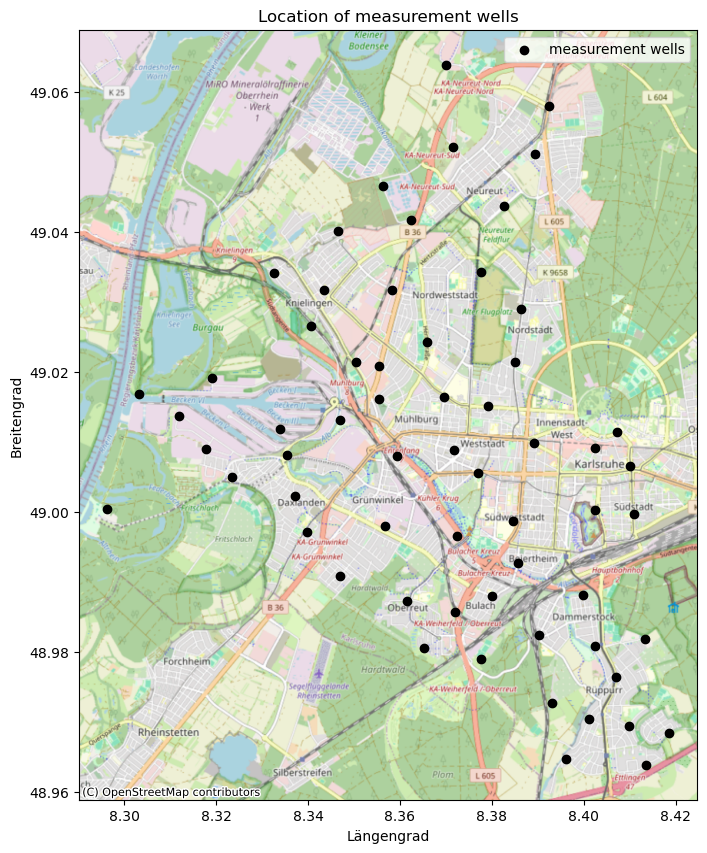

In [13]:
# [4] 
import contextily as ctx

# creating a Figure and Axes object
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# reading the shapefile of the measurement locations
monitoring = geopd.read_file("Messstellen_Karlsruhe.shp")

# plotting the measurement wells
monitoring.plot(ax=ax, marker='o', c='k', label='measurement wells')

# adding a basemap
ctx.add_basemap(ax, crs=monitoring.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik) # Straßenkarte
#ctx.add_basemap(ax, crs=monitoring.crs.to_string(), source=ctx.providers.OpenTopoMap) # Topografische Karte 

# adding axes labels, legend and title
ax.set_xlabel('Längengrad')
ax.set_ylabel('Breitengrad')
ax.legend()
ax.set_title ('Location of measurement wells')

plt.show()


## END